## <p style="background-color:#005b96; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">POLICE KILLING US</p>

<a id="00"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#FFF9ED; background-color:#005b96" data-toggle="popover">Content</a>

The file fatal-police-shootings-data.csv contains data about each fatal shooting in CSV format. The file can be downloaded at this URL. Each row has the following variables:

- **id:** a unique identifier for each victim
- **name:** the name of the victim
- **date:** the date of the fatal shooting in YYYY-MM-DD format
- **manner_of_death:** shot, shot and Tasered
- **armed:** indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    - undetermined: it is not known whether or not the victim had a weapon
    - unknown: the victim was armed, but it is not known what the object was
    - unarmed: the victim was not armed
- **age:** the age of the victim
- **gender:** the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    - M: Male
    - F: Female
    - None: unknown
- **race:**
    - W: White, non-Hispanic
    - B: Black, non-Hispanic
    - A: Asian
    - N: Native American
    - H: Hispanic
    - O: Other
    - None: unknown
- **city:** the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
- **state:** two-letter postal code abbreviation
- **signs of mental illness:** News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
- **threat_level:** The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.
- **flee:** News reports have indicated the victim was moving away from officers
    - Foot
    - Car
    - Not fleeing

The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.
- **body_camera:** News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

[SOURCE](https://github.com/washingtonpost/data-police-shootings)

## <p style="background-color:#005b96; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

In [48]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## INSTRUCTIONS

- **Task 1.** Plotting the number of killed people by gender<br>
- **Task 2.** Plotting the type of weapon used to kill people<br>
- **Task 3.** Plotting the killed people by age<br>
- **Task 4.** Plotting the killed people by race<br>
- **Task 5.** Plotting the killed people by race (Pie Chart)<br>
- **Task 6.** Plotting the most common 15 first or last name of killed people<br>

Read data

In [49]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [50]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [51]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 1: Plot number of killed people by gender

In [52]:
genders = kill['gender'].value_counts()

In [53]:
genders

M    2428
F     107
Name: gender, dtype: int64

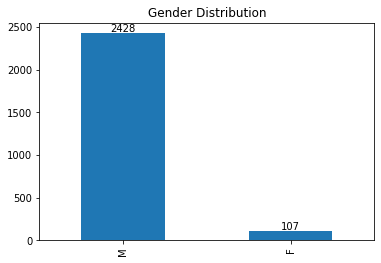

In [54]:
# with pandas
ax = genders.plot.bar(title='Gender Distribution')
for container in ax.containers:
    ax.bar_label(container)

In [55]:
genders.index


Index(['M', 'F'], dtype='object')

In [56]:
genders.values


array([2428,  107], dtype=int64)

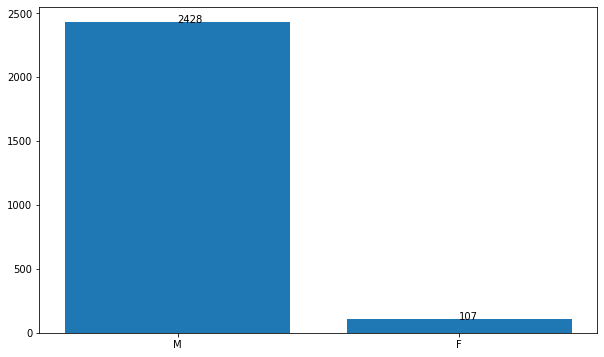

In [57]:
#with matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(genders.index, genders.values)
plt.title = ('Gender Distribution')
for index, value in enumerate(genders.values):
    plt.text(index, value, str(value))
plt.show()


## 2: Plot 7 most common kill weapons

In [58]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [59]:
common_weapons = kill['armed'].value_counts(dropna=False)[:7]
common_weapons

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

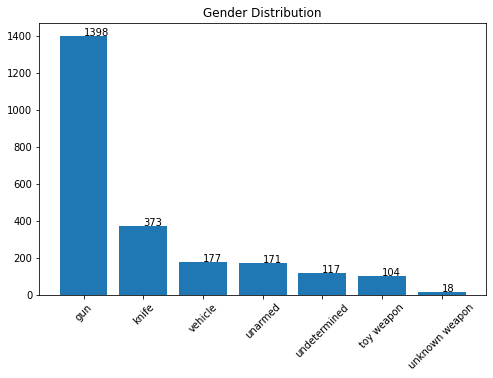

In [60]:
# with matplotlib
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(common_weapons.index, common_weapons.values)
ax.set_title('Gender Distribution')

plt.xticks(rotation=45)
for index, value in enumerate(common_weapons.values):
    plt.text(index, value, str(value))




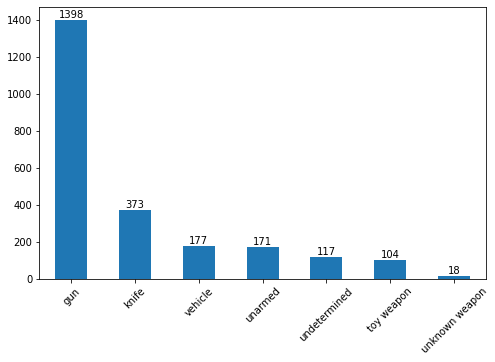

In [61]:
# with pandas
fig, ax = plt.subplots(figsize=(8, 5))

common_weapons.plot(kind='bar', ax=ax)
ax.set_xticklabels(common_weapons.index, rotation=45)
for container in ax.containers:
    ax.bar_label(container)


## 3: Plot number of age of killed people under three groups : Under 25 and Above 25, others

In [62]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [63]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [64]:
def age_cat(age):
    if age >= 25.0:
        return "above25"
    elif age < 25.0:
        return "below25"
    else:
        return "other"
   
kill["age_cat"] = kill.age.apply(age_cat)

kill.age_cat


0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531      other
2532    above25
2533    above25
2534    above25
Name: age_cat, Length: 2535, dtype: object

In [65]:
#kill["age_cat1"] = kill.age.apply(lambda x: 'above25' if x>=25 else 'below25' if x < 25 else 'other')
#kill["age_cat1"].value_counts()


In [66]:
kill.age_cat.value_counts()


above25    2008
below25     450
other        77
Name: age_cat, dtype: int64

In [67]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [68]:
age_class = kill.age_cat.value_counts()
age_class

above25    2008
below25     450
other        77
Name: age_cat, dtype: int64

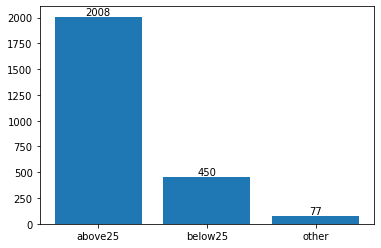

In [69]:
# with mathplotlib
fig, ax = plt.subplots()
ax.bar(age_class.index, age_class.values)
for container in ax.containers:
    ax.bar_label(container)


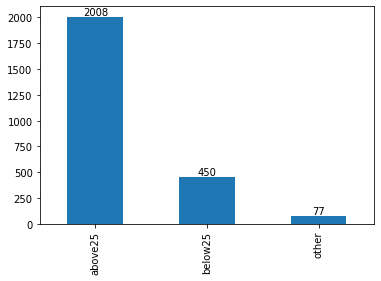

In [70]:
# with pandas
ax = age_class.plot.bar()
for container in ax.containers:
    ax.bar_label(container)


## 4: Plot number of killed poeple by race

In [71]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [72]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

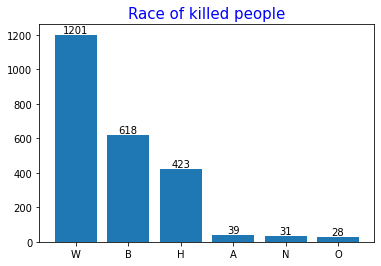

In [73]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(race_freq.index, race_freq.values)
ax.set_title('Race of killed people', color='blue', fontsize=15)
for container in ax.containers:
    ax.bar_label(container)
plt.show()


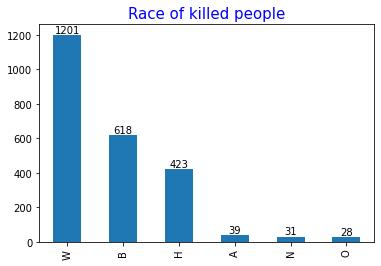

In [74]:
# with pandas
ax = race_freq.plot.bar()
ax.set_title('Race of killed people', color='blue', fontsize=15)
for container in ax.containers:
    ax.bar_label(container)

## 5: Killed People According to Races (Pie Chart)

In [75]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [76]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [77]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [78]:
kill.shape

(2535, 15)

In [79]:
kill.dropna(axis=0, inplace=True)

In [80]:
kill.shape

(2254, 15)

In [81]:
kill.race.value_counts(dropna=False)


W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [82]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [83]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [84]:
sizes=kill.race.value_counts().values
sizes

array([1168,  592,  401,   36,   29,   28], dtype=int64)

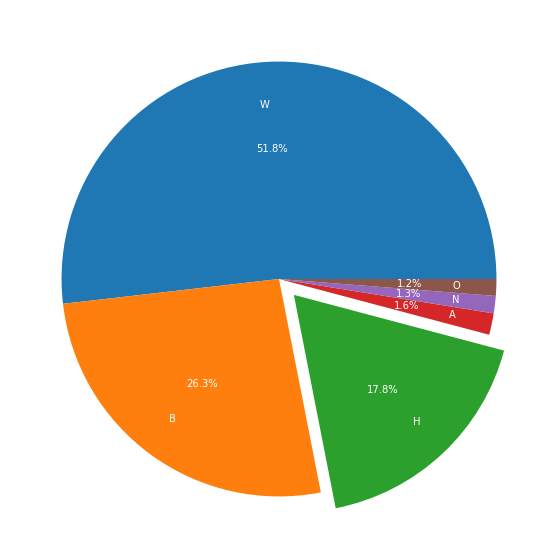

In [88]:
plt.figure(figsize=(10, 10))
myexplode = [0, 0, 0.1, 0, 0, 0]
plt.pie(sizes, labels=labels, labeldistance=0.8,
        autopct=lambda p: f'{p:.1f}%', explode=myexplode, textprops={'color': "white"});


## 6:PLOT THE MOST COMMON 15 FIRST & LAST NAME OF KILLED PEOPLE


In [89]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [90]:
kill.shape

(2254, 15)

In [91]:
kill.name.value_counts()

Michael Johnson             2
Eric Harris                 2
Daquan Antonio Westbrook    2
Brandon Jones               2
Michael Brown               2
                           ..
Bernard Brandon Powers      1
Kevin Lau                   1
Joe Pasquez Ortiz           1
Anthony Aguilar             1
Dwayne Jeune                1
Name: name, Length: 2249, dtype: int64

In [92]:
kill[kill.name == 'TK TK']


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
2465,2748,TK TK,05/07/17,shot,undetermined,24.0,M,H,Vista,CA,False,undetermined,Foot,False,below25


In [93]:
# TK TK is most probably not a name or surname. We will clean them.

pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()


0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [97]:
pairs.sample(10)

243            [Benjamin, Quezada]
2484        [Antonio, Garcia, Jr.]
2138          [Evin, Sanna, Olsen]
894          [Justin, D., McHenry]
1156                 [Earl, Hicks]
1597               [Danny, Pirtle]
735            [Anthony, McKinney]
1868    [Abdul, Razak, Ali, Artan]
1683           [Terence, Crutcher]
1609               [Joseph, Weber]
Name: name, dtype: object

In [98]:
type(pairs)

pandas.core.series.Series

**1:** We need to separate the names and surnames because we are asking most common name OR surname.

**2:** After seperation make a whole list that contains both names and surnames.

**3:** How to separate the name and surname pairs?

>> pairs = [(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]<br>
>> numbers, letters = zip(*pairs)<br>
>> numbers<br>
(1, 2, 3, 4)<br>
>> letters<br>
('a', 'b', 'c', 'd')

**4:** We can use Counter() and most_common() built in functions together to find the most common names or surnames, or we can write our own functions for this purpose.

By First Name:

In [99]:
pairs.shape


(2253,)

In [100]:
pairs[0]

['Tim', 'Elliot']

In [101]:
pairs[0][0]

'Tim'

In [102]:
table = []
for i in pairs:
  for j in i:
    table.append(j)

In [103]:
len(table)

5339

In [104]:
from collections import Counter
most_common_names = Counter(table)
most_common_names

Counter({'Tim': 3,
         'Elliot': 1,
         'Lewis': 7,
         'Lee': 37,
         'Lembke': 1,
         'John': 36,
         'Paul': 16,
         'Quintero': 2,
         'Matthew': 22,
         'Hoffman': 2,
         'Michael': 82,
         'Rodriguez': 13,
         'Kenneth': 17,
         'Joe': 9,
         'Brown': 17,
         'Arnold': 2,
         'Buck': 3,
         'Brock': 2,
         'Nichols': 3,
         'Autumn': 1,
         'Steele': 1,
         'Leslie': 2,
         'Sapp': 2,
         'III': 9,
         'Patrick': 13,
         'Wetter': 1,
         'Ron': 2,
         'Sneed': 1,
         'Hashim': 1,
         'Hanif': 1,
         'Ibn': 1,
         'Abdul-Rasheed': 1,
         'Nicholas': 13,
         'Ryan': 16,
         'Brickman': 1,
         'Omarr': 1,
         'Julian': 3,
         'Maximillian': 1,
         'Jackson': 9,
         'Loren': 3,
         'Simpson': 4,
         'James': 47,
         'Dudley': 1,
         'Barker': 2,
         'Artago': 1,
     

In [105]:
most_common_names = most_common_names.most_common(15)
most_common_names

[('Michael', 82),
 ('David', 53),
 ('James', 47),
 ('Robert', 44),
 ('Joseph', 43),
 ('Daniel', 40),
 ('William', 40),
 ('Lee', 37),
 ('John', 36),
 ('Christopher', 35),
 ('Richard', 33),
 ('Smith', 31),
 ('J.', 30),
 ('Johnson', 29),
 ('Joshua', 27)]

In [106]:
df = pd.DataFrame(list(most_common_names), columns=[
                  "name_or_surname_most_frequency", "frequency"])
df

,name_or_surname_most_frequency,frequency
0,Michael,82
1,David,53
2,James,47
3,Robert,44
4,Joseph,43
...,...,...
10,Richard,33
11,Smith,31
12,J.,30
13,Johnson,29


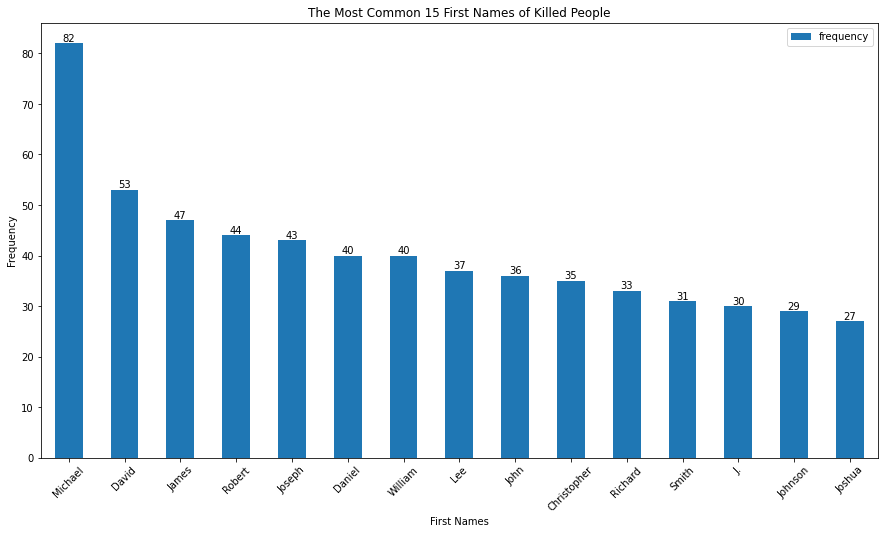

In [107]:
# with pandas
fig, ax = plt.subplots(figsize=(15, 8))
df.plot(rot=45, kind='bar', ax=ax)

ax.set_ylabel("Frequency")
ax.set_xlabel("First Names")
ax.set_title("The Most Common 15 First Names of Killed People")

ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)
for container in ax.containers:ax.bar_label(container)

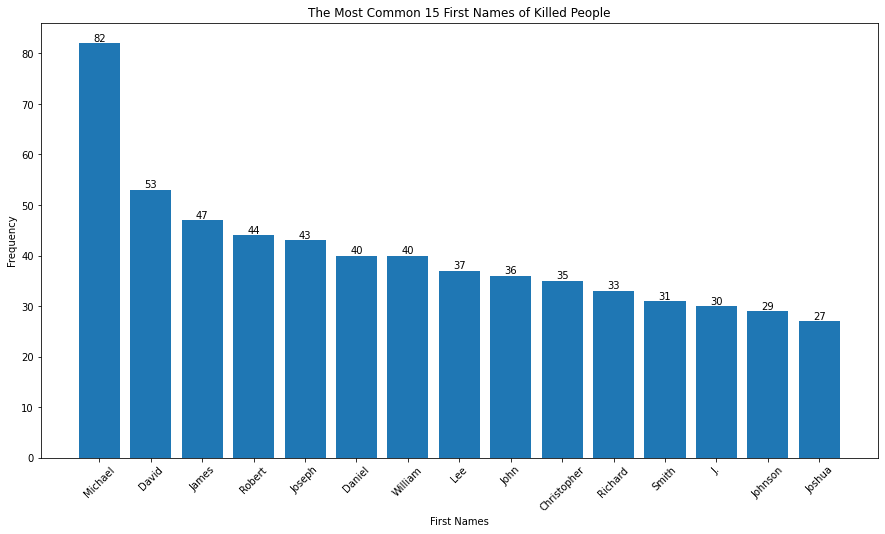

In [108]:
# with matplotlib
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=df.name_or_surname_most_frequency, height=df.frequency)

ax.set_ylabel("Frequency")
ax.set_xlabel("First Names")
ax.set_title("The Most Common 15 First Names of Killed People")

ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)
for container in ax.containers:ax.bar_label(container)

By Last Name:

In [109]:
table2 = []

for i in pairs:
    table2.append(i[-1])
len(table2)

2253

In [110]:
name = {}

for i in table2:
    if i in name:
        name[i] += 1
    else:
        name[i] = 1
len(name)

1617

In [ ]:
sorted(name.items(), key=lambda x: x[1], reverse=True)[:10]

In [111]:
df_name = pd.DataFrame(sorted(name.items(), key=lambda x: x[1], reverse=True)[
                       :10], columns=["name", "val"])
df_name

,name,val
0,Smith,31
1,Johnson,29
2,Jr.,18
3,Williams,16
4,Brown,14
5,Hall,13
6,Hernandez,13
7,Rodriguez,12
8,Jones,12
9,Anderson,12


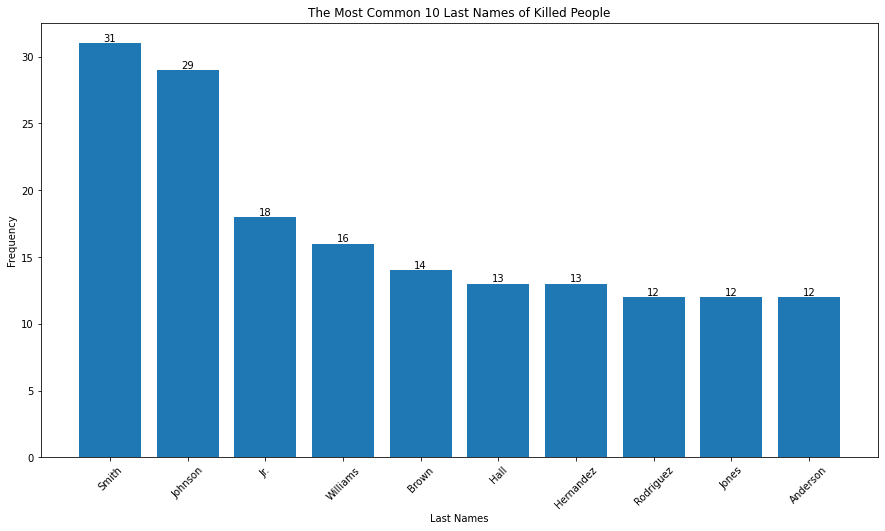

In [112]:
# with matplotlib
x = df_name.name
y = df_name.val

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x=x, height=y)

ax.set_ylabel("Frequency")
ax.set_xlabel("Last Names")
ax.set_title("The Most Common 10 Last Names of Killed People")
ax.set_xticklabels(x, rotation=45)
for container in ax.containers:ax.bar_label(container)